<a href="https://colab.research.google.com/github/ramesh112/haas-m17/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [72]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [73]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [75]:

df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [76]:
for col in ["job","marital","education","default","housing","loan","poutcome"]:
    print(col, df[col].value_counts().get("unknown", 0))

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
poutcome 0


In [77]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [78]:
yes_df  = df[df["y"] == "yes"]
no_df   = df[df["y"] == "no"]   # optional, for comparison

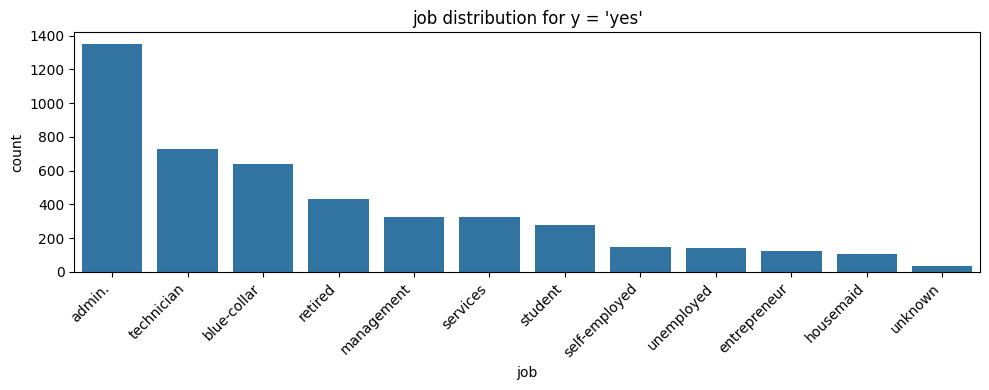

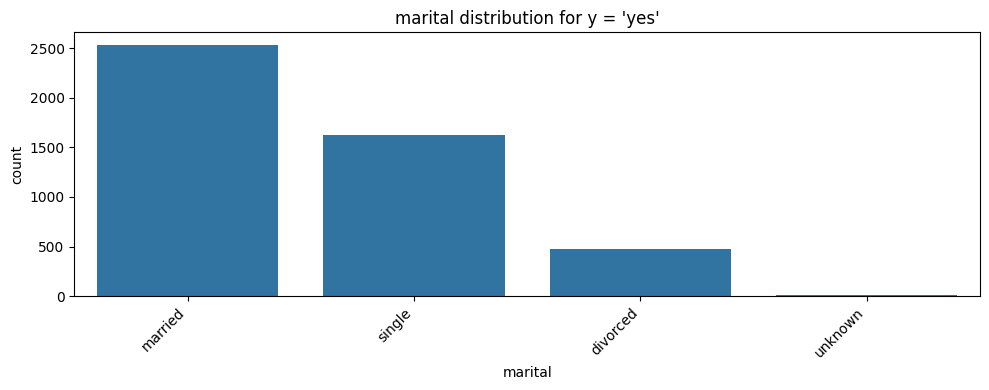

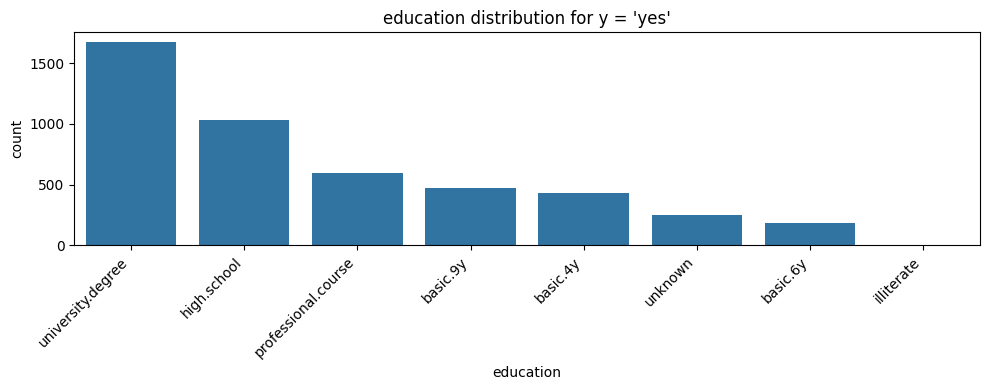

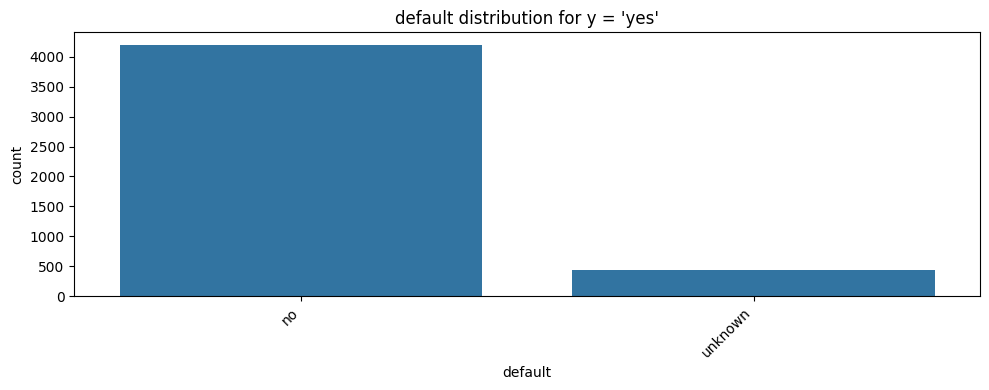

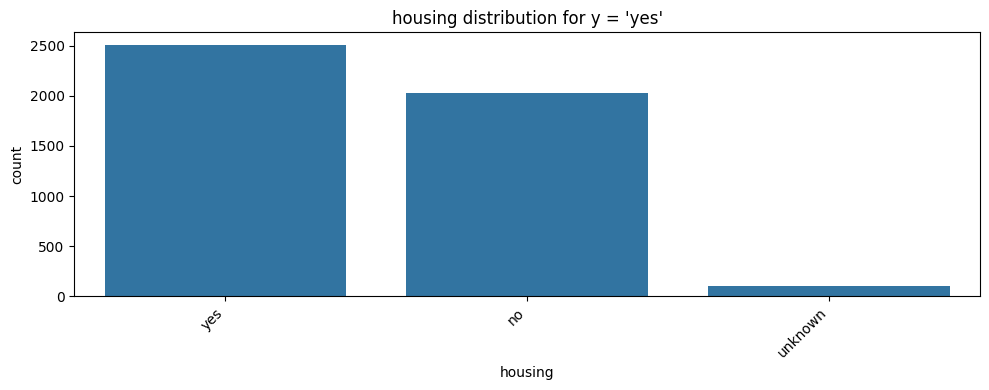

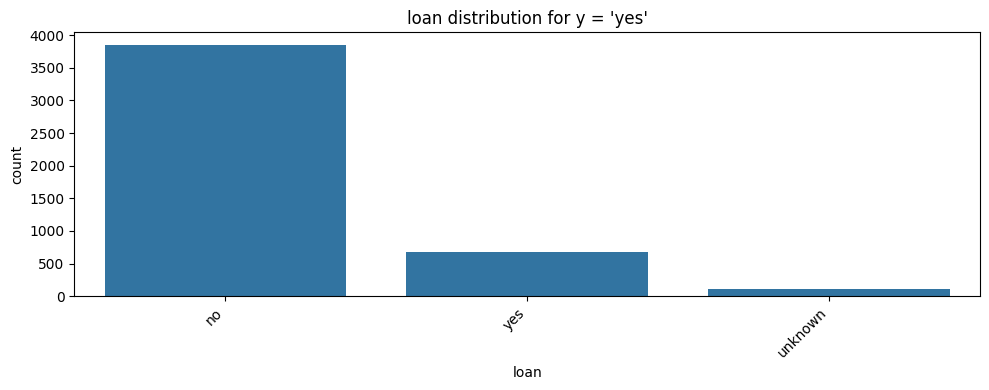

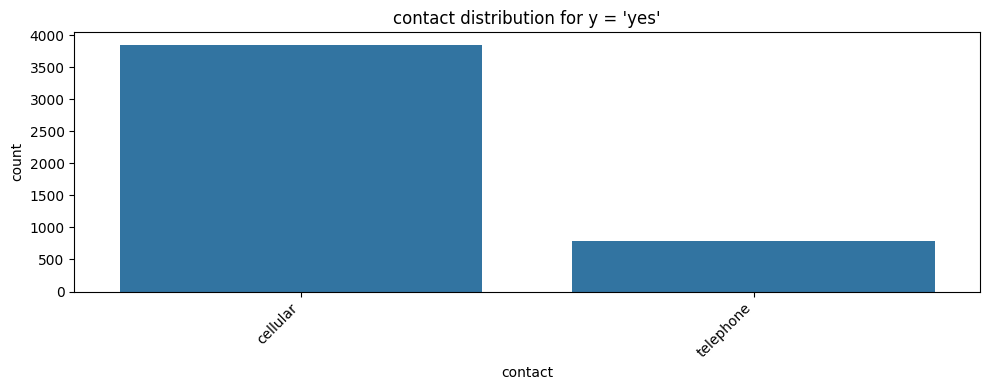

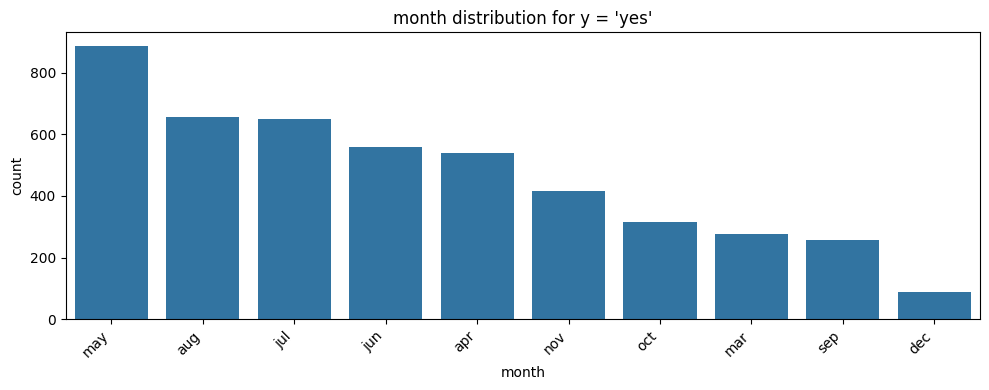

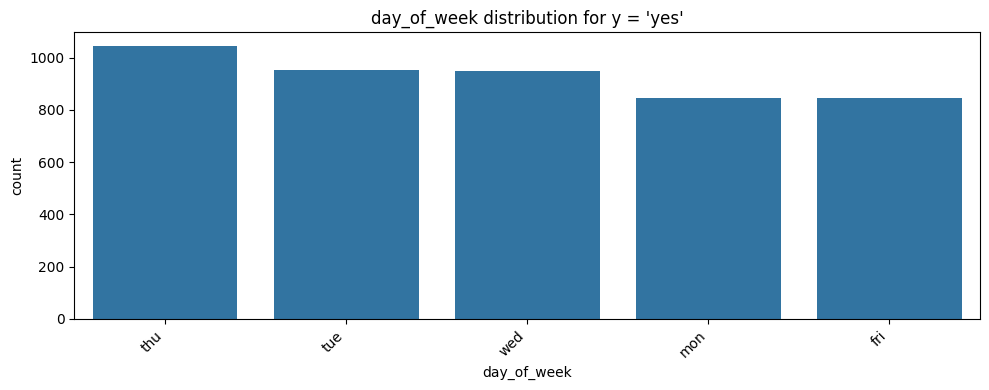

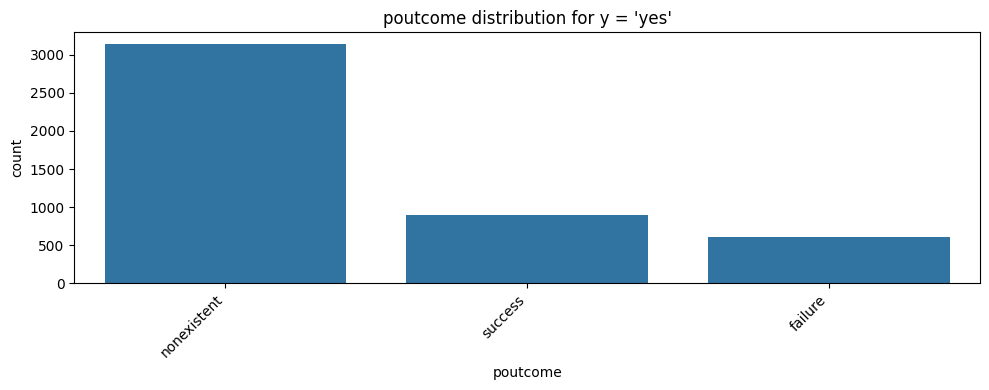

In [90]:
cat_cols = [
    "job", "marital", "education", "default",
    "housing", "loan", "contact", "month",
    "day_of_week", "poutcome"
]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=yes_df, x=col, order=yes_df[col].value_counts().index)
    plt.title(f"{col} distribution for y = 'yes'")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f'data/images/{col}_plot.png')
    plt.show()

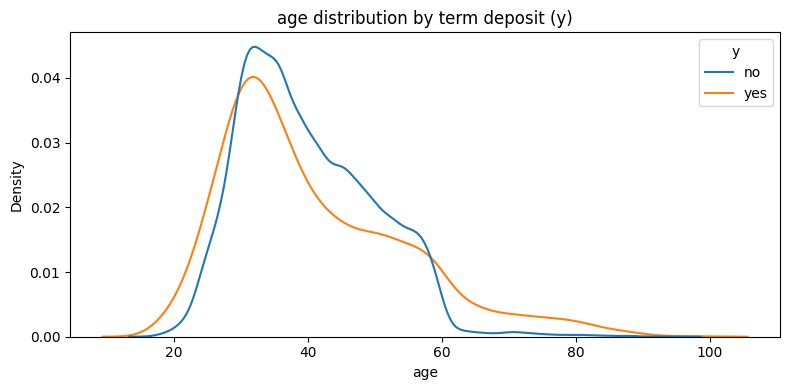

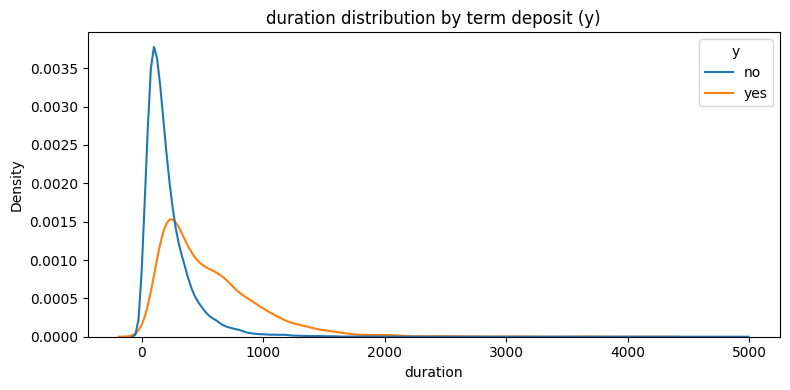

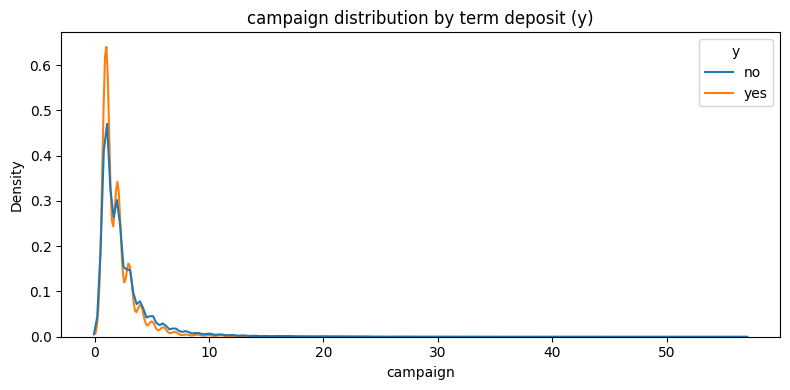

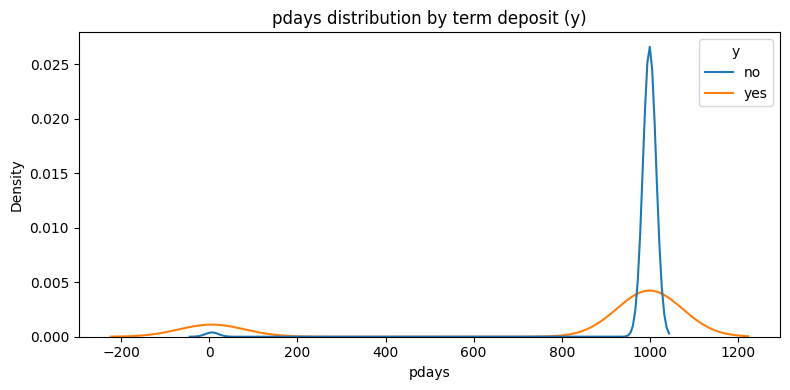

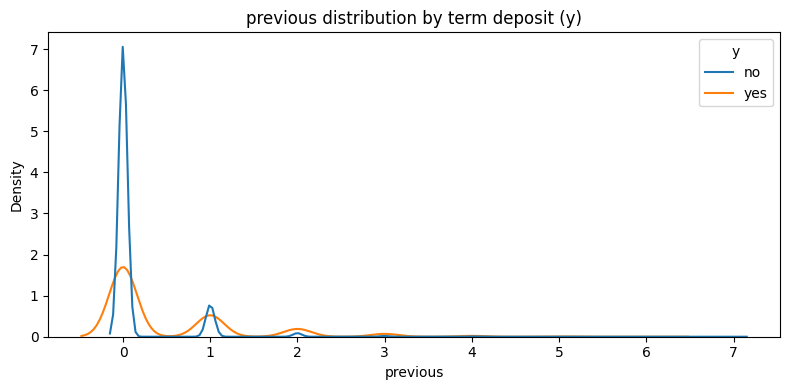

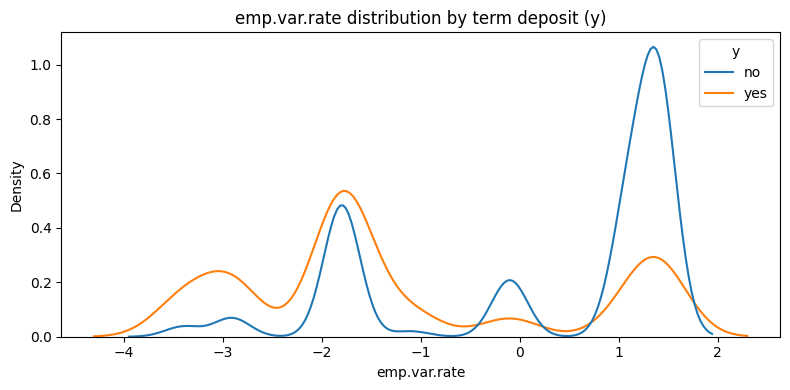

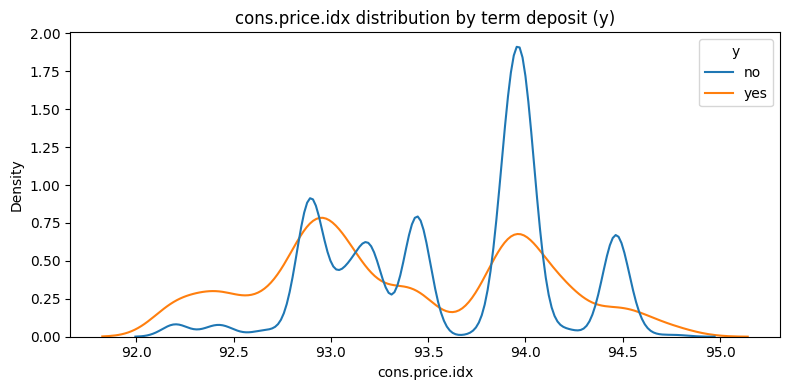

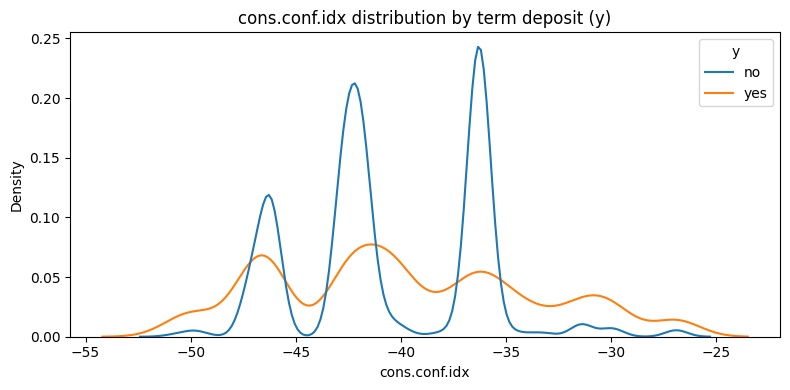

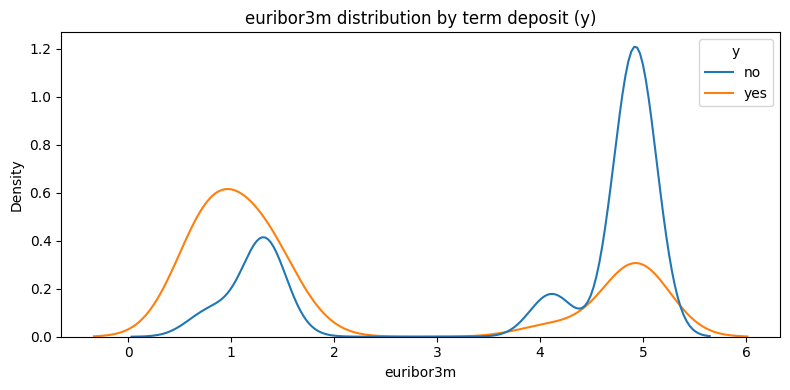

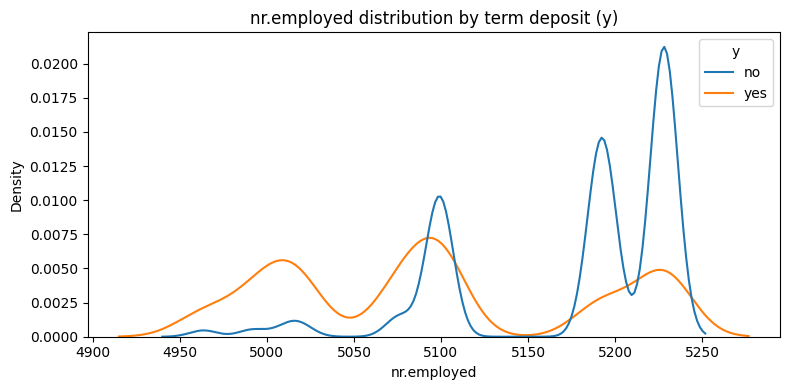

In [80]:
num_cols = ["age", "duration", "campaign", "pdays", "previous",
            "emp.var.rate", "cons.price.idx", "cons.conf.idx",
            "euribor3m", "nr.employed"]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=col, hue="y", common_norm=False)
    plt.title(f"{col} distribution by term deposit (y)")
    plt.tight_layout()
    plt.show()

In [81]:
# all columns except the target
feature_cols = [
    "age", "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "day_of_week", "duration", "campaign", "pdays",
    "previous", "poutcome", "emp.var.rate", "cons.price.idx",
    "cons.conf.idx", "euribor3m", "nr.employed"
]

yes_counts_by_feature = {}

for col in feature_cols:
    # for categoricals: counts per category
    # for numerics: counts per distinct value
    yes_counts_by_feature[col] = yes_df[col].value_counts()

# Example: inspect a few
print("Total yes rows:", yes_df.shape[0])
for col in feature_cols:
    print(f"=== {col} (yes counts) ===")
    print(yes_df[col].value_counts())
    print()

print("\nJob – yes counts:\n", yes_counts_by_feature["job"])
print("\nMonth – yes counts:\n", yes_counts_by_feature["month"])
print("\nPoutcome – yes counts:\n", yes_counts_by_feature["poutcome"])

Total yes rows: 4640
=== age (yes counts) ===
age
31    220
33    210
30    202
29    186
32    184
     ... 
84      3
17      2
98      2
89      2
87      1
Name: count, Length: 75, dtype: int64

=== job (yes counts) ===
job
admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: count, dtype: int64

=== marital (yes counts) ===
marital
married     2532
single      1620
divorced     476
unknown       12
Name: count, dtype: int64

=== education (yes counts) ===
education
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: count, dtype: int64

=== default (yes counts) ===
default
no         4197
unkn

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [82]:

bank_cols = ["age", "job", "marital", "education", "default", "contact", "loan"]
target_col = "y"

X = df[bank_cols].copy()
y = df[target_col].map({"no": 0, "yes": 1})  # binary target

X.head()
X.info()


numeric_features = ["age"]
categorical_features = ["job", "marital", "education", "default", "contact", "loan"]

numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   contact    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [84]:
baseline_acc = y_train.value_counts(normalize=True).max()
print("Baseline accuracy (majority class):", baseline_acc)

Baseline accuracy (majority class): 0.8873444613050075


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [85]:
log_reg_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000, n_jobs=-1))
    ]
)

log_reg_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'contact', 'loan'])])),
                ('model', LogisticRegression(max_iter=1000, n_jobs=-1))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [86]:
train_acc_lr = log_reg_clf.score(X_train, y_train)
test_acc_lr = log_reg_clf.score(X_test, y_test)
print("Logistic Regression train accuracy:", train_acc_lr)
print("Logistic Regression test accuracy:", test_acc_lr)

Logistic Regression train accuracy: 0.8873444613050075
Logistic Regression test accuracy: 0.8873512988589464


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [87]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []

for name, clf in models.items():
    pipe = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", clf)
        ]
    )

    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, pos_label=1)
    test_rec = recall_score(y_test, y_test_pred, pos_label=1)

    train_time = end - start

    results.append(
        {
            "Model": name,
            "Train Time (s)": train_time,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Test Precision (pos=1)": test_prec,
            "Test Recall (pos=1)": test_rec,
        }
    )

results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Train Time (s),Train Accuracy,Test Accuracy,Test Precision (pos=1),Test Recall (pos=1)
0,LogisticRegression,1.200194,0.887344,0.887351,0.000000,0.000000
1,KNN,0.104023,0.892686,0.876184,0.292793,0.070043
2,DecisionTree,0.209700,0.914871,0.864166,0.229462,0.087284
3,SVM,83.387189,0.888012,0.886744,0.391304,0.009698


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [88]:
# -------------------------
# Problem 11: Improving models
# 1) Class-weighted Logistic Regression (handle imbalance)
# 2) Grid search on Decision Tree, optimizing F1
# -------------------------

# 1) Class-weighted Logistic Regression
log_reg_bal = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000, n_jobs=-1, class_weight="balanced"))
    ]
)
log_reg_bal.fit(X_train, y_train)
y_test_pred_lr_bal = log_reg_bal.predict(X_test)

print("\nBalanced LogReg test accuracy:", accuracy_score(y_test, y_test_pred_lr_bal))
print("Balanced LogReg test precision:", precision_score(y_test, y_test_pred_lr_bal))
print("Balanced LogReg test recall:", recall_score(y_test, y_test_pred_lr_bal))
print("Balanced LogReg test F1:", f1_score(y_test, y_test_pred_lr_bal))

# 2) Tuned Decision Tree with GridSearchCV (optimize F1)
dt_pipe = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", DecisionTreeClassifier(random_state=42))
    ]
)

param_grid_dt = {
    "model__max_depth": [3, 5, 7, 9, None],
    "model__min_samples_split": [2, 10, 20],
    "model__min_samples_leaf": [1, 5, 10],
}

dt_search = GridSearchCV(
    dt_pipe,
    param_grid=param_grid_dt,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

dt_search.fit(X_train, y_train)

print("\nBest DT params:", dt_search.best_params_)
print("Best DT CV F1:", dt_search.best_score_)

best_dt = dt_search.best_estimator_
y_test_pred_dt = best_dt.predict(X_test)

print("Tuned DT test accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Tuned DT test precision:", precision_score(y_test, y_test_pred_dt))
print("Tuned DT test recall:", recall_score(y_test, y_test_pred_dt))
print("Tuned DT test F1:", f1_score(y_test, y_test_pred_dt))


Balanced LogReg test accuracy: 0.5722262685117747
Balanced LogReg test precision: 0.17255297679112008
Balanced LogReg test recall: 0.7370689655172413
Balanced LogReg test F1: 0.2796402289452167
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best DT params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best DT CV F1: 0.152736897831748
Tuned DT test accuracy: 0.8647730031561058
Tuned DT test precision: 0.23275862068965517
Tuned DT test recall: 0.08728448275862069
Tuned DT test F1: 0.12695924764890282


##### Questions